In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
nike  = pd.read_csv("https://s3.amazonaws.com/peyck.es/BDA_Project/oct18-oct19.csv")
nike.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,4/1/19 0:00,SneakerShouts,NaN,0,2,24,STEAL: Over 50% OFF + free shipping on the Nik...,NaN,NaN,NaN,1.110000e+18,https://twitter.com/SneakerShouts/status/11125...
1,4/1/19 0:00,Ebay_Birmingham,NaN,0,0,0,Check out #Nike Dry Fit Shorts Women's Tempo N...,NaN,@eBay,#Nike #Nike #ebay #poshmark #mercari,1.110000e+18,https://twitter.com/Ebay_Birmingham/status/111...
2,4/1/19 0:00,SneakerNews,NaN,2,15,102,"The Nike Air Max 97 ""Seoul"" will release via N...",NaN,NaN,NaN,1.110000e+18,https://twitter.com/SneakerNews/status/1112504...
3,4/1/19 0:00,titoloshop,NaN,0,0,0,Nike Air Vapormax Flyknit 3 - Atmosphere Grey/...,NaN,NaN,NaN,1.110000e+18,https://twitter.com/titoloshop/status/11125048...
4,4/1/19 0:00,Taniabanks24,BornLiveDieFree,2,0,0,@MichaelAvenatti He ain‚Äôt dumb he is not sho...,NaN,@MichaelAvenatti,NaN,1.110000e+18,https://twitter.com/Taniabanks24/status/111250...


In [ ]:
print('Dataset size:',nike.shape)
print('Columns are:',nike.columns)

Dataset size: (4430893, 12)
Columns are: Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')


In [ ]:
nike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430893 entries, 0 to 4430892
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   username   object 
 2   to         object 
 3   replies    int64  
 4   retweets   int64  
 5   favorites  int64  
 6   text       object 
 7   geo        float64
 8   mentions   object 
 9   hashtags   object 
 10  id         float64
 11  permalink  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 405.7+ MB


In [ ]:
nike.columns

Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')

In [ ]:
nike.isnull().sum()

date               0
username           1
to           2984178
replies            0
retweets           0
favorites          0
text               0
geo          4430893
mentions     3383080
hashtags     3299590
id                 0
permalink          0
dtype: int64

In [ ]:
# statistical information about the dataset
nike.describe()

,replies,retweets,favorites,geo,id
count,4.430893e+06,4.430893e+06,4.430893e+06,0.0,4.430893e+06
mean,5.198083e-01,1.966998e+00,8.718415e+00,NaN,1.122972e+18
std,2.759071e+01,1.521752e+02,4.682563e+02,NaN,4.046198e+16
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.046550e+18
25%,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.090000e+18
50%,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.130000e+18
75%,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.150000e+18
max,3.018600e+04,1.923170e+05,4.482950e+05,NaN,1.190000e+18


In [ ]:
# statistical information about the categorical variable
nike.describe(include=['O']).T

,count,unique,top,freq
date,4430893,550716,7/7/19 17:00,1354
username,4430892,1514640,StockXLive,38991
to,1446715,439408,Nike,38987
text,4430893,4025865,Nike,15050
mentions,1047813,210711,@poshmarkapp,176117
hashtags,1131303,459530,#shopmycloset,168407
permalink,4430893,4430893,https://twitter.com/SneakerShouts/status/11125...,1


In [ ]:
#missed step, adding empty value to mentions and hashtags as it will help in future for much better analysis. 
nike.mentions = nike.mentions.fillna('@EMPTY')
#nike.hashtags = nike.hashtags.fillna('#EMPTY')
nike.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,4/1/19 0:00,SneakerShouts,NaN,0,2,24,STEAL: Over 50% OFF + free shipping on the Nik...,NaN,@EMPTY,NaN,1.110000e+18,https://twitter.com/SneakerShouts/status/11125...
1,4/1/19 0:00,Ebay_Birmingham,NaN,0,0,0,Check out #Nike Dry Fit Shorts Women's Tempo N...,NaN,@eBay,#Nike #Nike #ebay #poshmark #mercari,1.110000e+18,https://twitter.com/Ebay_Birmingham/status/111...
2,4/1/19 0:00,SneakerNews,NaN,2,15,102,"The Nike Air Max 97 ""Seoul"" will release via N...",NaN,@EMPTY,NaN,1.110000e+18,https://twitter.com/SneakerNews/status/1112504...
3,4/1/19 0:00,titoloshop,NaN,0,0,0,Nike Air Vapormax Flyknit 3 - Atmosphere Grey/...,NaN,@EMPTY,NaN,1.110000e+18,https://twitter.com/titoloshop/status/11125048...
4,4/1/19 0:00,Taniabanks24,BornLiveDieFree,2,0,0,@MichaelAvenatti He ain‚Äôt dumb he is not sho...,NaN,@MichaelAvenatti,NaN,1.110000e+18,https://twitter.com/Taniabanks24/status/111250...


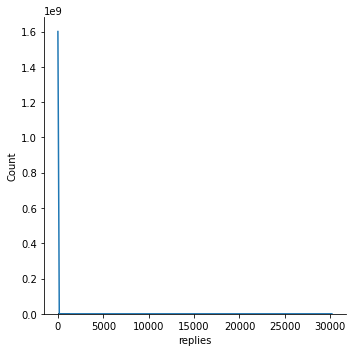

In [ ]:
#visualization for all int types

sns.displot(x='replies', data=nike, kde=True)

In [ ]:
nike['replies'].unique()

array([    0,     2,    19,     1,     3,     4,     7,    12,    15,
           8,     5,    11,     6,   203,    10,    34,    30,    17,
           9,    33,    44,    14,    24,    13,    27,   165,    20,
          73,    22,    39,   138,    16,   119,    21,    90,    41,
          26,    18,    29,    56,    23,    37,    66,   190,    74,
          55,    48,    28,    35,    61,   145,    76,   213,    42,
         116,   113,   177,    46,    58,    50,    87,    59,    70,
         180,   202,   280,    31,   783,   232,    40,   206,    89,
          43,   210,    93,  1375,   669,   424,    25,   160,    53,
         178,    82,   410,   176,   319,   345,    49,    68,   237,
         312,   265,    62,    71,   100,   105,    45,    32,   320,
          67,   112,    85,    78,    36,   218,    81,    47,    79,
         153,    38,   234,   110,  1986,   268,    95,   205,    54,
         227,   130,  1040,   129,  2064,   324,    96,   228,   120,
          57,   377,

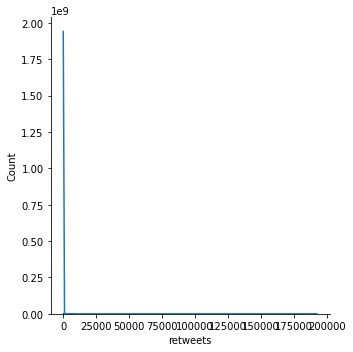

In [ ]:
sns.displot(x='retweets', data=nike, kde=True)

In [ ]:
nike['retweets'].unique()

array([   2,    0,   15, ..., 1655, 3510,  812])

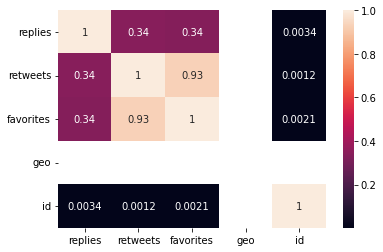

In [ ]:
#correlation of data

sns.heatmap(nike.corr(), annot=True)

In [ ]:
#sns.pairplot(nike)

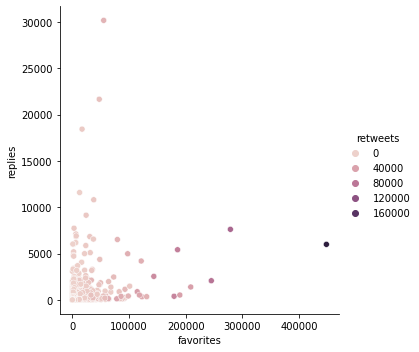

In [ ]:
sns.relplot(x='favorites', y ='replies',hue='retweets', data= nike)

In [ ]:
#data cleaning
nike_df = nike.drop(['geo'], axis=1)

In [ ]:
#trying to replace hashtags with space and let keyword be present in the dataframe. 

nike_df.hashtags.replace(to_replace='#\w+', regex=True, value='')[0]

nan

In [ ]:
nike_df.head()

,date,username,to,replies,retweets,favorites,text,mentions,hashtags,id,permalink
0,4/1/19 0:00,SneakerShouts,NaN,0,2,24,STEAL: Over 50% OFF + free shipping on the Nik...,@EMPTY,NaN,1.110000e+18,https://twitter.com/SneakerShouts/status/11125...
1,4/1/19 0:00,Ebay_Birmingham,NaN,0,0,0,Check out #Nike Dry Fit Shorts Women's Tempo N...,@eBay,#Nike #Nike #ebay #poshmark #mercari,1.110000e+18,https://twitter.com/Ebay_Birmingham/status/111...
2,4/1/19 0:00,SneakerNews,NaN,2,15,102,"The Nike Air Max 97 ""Seoul"" will release via N...",@EMPTY,NaN,1.110000e+18,https://twitter.com/SneakerNews/status/1112504...
3,4/1/19 0:00,titoloshop,NaN,0,0,0,Nike Air Vapormax Flyknit 3 - Atmosphere Grey/...,@EMPTY,NaN,1.110000e+18,https://twitter.com/titoloshop/status/11125048...
4,4/1/19 0:00,Taniabanks24,BornLiveDieFree,2,0,0,@MichaelAvenatti He ain‚Äôt dumb he is not sho...,@MichaelAvenatti,NaN,1.110000e+18,https://twitter.com/Taniabanks24/status/111250...


In [ ]:
nike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430893 entries, 0 to 4430892
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   username   object 
 2   to         object 
 3   replies    int64  
 4   retweets   int64  
 5   favorites  int64  
 6   text       object 
 7   mentions   object 
 8   hashtags   object 
 9   id         float64
 10  permalink  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 371.9+ MB


In [ ]:
df = nike_df[['username','text','mentions','hashtags']]

In [ ]:
df.head()

,username,text,mentions,hashtags
0,SneakerShouts,STEAL: Over 50% OFF + free shipping on the Nik...,@EMPTY,NaN
1,Ebay_Birmingham,Check out #Nike Dry Fit Shorts Women's Tempo N...,@eBay,#Nike #Nike #ebay #poshmark #mercari
2,SneakerNews,"The Nike Air Max 97 ""Seoul"" will release via N...",@EMPTY,NaN
3,titoloshop,Nike Air Vapormax Flyknit 3 - Atmosphere Grey/...,@EMPTY,NaN
4,Taniabanks24,@MichaelAvenatti He ain‚Äôt dumb he is not sho...,@MichaelAvenatti,NaN


In [ ]:
nike_df.isnull().sum()

date               0
username           1
to           2984178
replies            0
retweets           0
favorites          0
text               0
mentions           0
hashtags     3299590
id                 0
permalink          0
dtype: int64

In [ ]:
#drop redundant columns
nike_df.drop(['to', 'hashtags'], axis=1, inplace=True)

In [ ]:
nike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430893 entries, 0 to 4430892
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   username   object 
 2   replies    int64  
 3   retweets   int64  
 4   favorites  int64  
 5   text       object 
 6   mentions   object 
 7   id         float64
 8   permalink  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 304.2+ MB


In [ ]:
nike_df.describe()

,replies,retweets,favorites,id
count,4.430893e+06,4.430893e+06,4.430893e+06,4.430893e+06
mean,5.198083e-01,1.966998e+00,8.718415e+00,1.122972e+18
std,2.759071e+01,1.521752e+02,4.682563e+02,4.046198e+16
min,0.000000e+00,0.000000e+00,0.000000e+00,1.046550e+18
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+18
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+18
75%,0.000000e+00,0.000000e+00,1.000000e+00,1.150000e+18
max,3.018600e+04,1.923170e+05,4.482950e+05,1.190000e+18


In [ ]:
df['text'].unique()

array(['STEAL: Over 50% OFF + free shipping on the Nike Air Huarache OG "Persian Violet" BUY HERE: http://bit.ly/2wsRZdW pic.twitter.com/f9nIazjbmT',
       "Check out #Nike Dry Fit Shorts Women's Tempo Neon Pink Yellow Lined Swoosh Active Sz M #Nike https://ebay.us/WY8wrA via @eBay #ebay #poshmark #mercari",
       'The Nike Air Max 97 "Seoul" will release via Nike SNKRS on April 13th https://snkrne.ws/2uw3i3E pic.twitter.com/MPcKBT63lz',
       ...,
       'NFLShop - The Official Online Shop of the NFL | 2019 NFL Nike Gear, NFL Apparel & NFL Merchandise http://wild.link/nflshop/AK3QCw',
       'New Uniforms are in! Thanks @Nike @ToBrad1 we will be playing in the @reale1t1 Invitational this weekend!pic.twitter.com/QpzmC0G67P',
       "There's obviously a good chance that I'm going to sign a gazillion dollar contract with Nike as soon as I get a pen in my hand. https://twitter.com/AdamZagoria/status/1112503688055218177 ‚Ä¶"],
      dtype=object)

In [ ]:
len(nike_df['text'].unique())

4025865

In [ ]:
df['mentions'].unique()

array(['@EMPTY', '@eBay', '@MichaelAvenatti', ...,
       '@ZO2_ @Lakers @Nike @MagicJohnson', '@nike @tlgstuff',
       '@Nike @ToBrad1 @reale1t1'], dtype=object)

In [ ]:
len(nike_df['mentions'].unique())

210712

In [ ]:
#Modelling Kmeans

In [ ]:
X = nike_df
y =  nike_df['text']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X[''] = le.fit_transform(X['text'])

y = le.transform(y)

In [ ]:
[[1.8548635531406916,3.4263211514376684,2.3388469034105257,1.7377334665793225,3.576042825398918,1.0266078608494207,1.5847334870686396,2.4250641969813755,3.851605480514457,0.6604404580880586,4.583204153385793,3.717044205279833,3.0257883902962495,4.692022239879393,3.112807801705332,5.438689755800993,5.524148861279697,4.912719434612777,0.18262619183558798],
 [1.8548635531406916,3.4263211514376684,2.3388469034105257,1.7377334665793225,3.576042825398918,1.0266078608494207,1.5847334870686396,2.4250641969813755,3.851605480514457,0.6604404580880586,4.583204153385793,3.717044205279833,3.0257883902962495,4.692022239879393,3.112807801705332,5.438689755800993,5.524148861279697,4.912719434612777,0.18262619183558798],
 [1.8548635531406916,3.4263211514376684,2.3388469034105257,1.7377334665793225,3.576042825398918,1.0266078608494207,1.5847334870686396,2.4250641969813755,3.851605480514457,0.6604404580880586,4.583204153385793,3.717044205279833,3.0257883902962495,4.692022239879393,3.112807801705332,5.438689755800993,5.524148861279697,4.912719434612777,0.18262619183558798]]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430893 entries, 0 to 4430892
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   username   object 
 2   replies    int64  
 3   retweets   int64  
 4   favorites  int64  
 5   text       int64  
 6   mentions   object 
 7   id         float64
 8   permalink  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 304.2+ MB


In [ ]:
X.head()

,date,username,replies,retweets,favorites,text,mentions,id,permalink
0,4/1/19 0:00,SneakerShouts,0,2,24,2879634,@EMPTY,1.110000e+18,https://twitter.com/SneakerShouts/status/11125...
1,4/1/19 0:00,Ebay_Birmingham,0,0,0,638449,@eBay,1.110000e+18,https://twitter.com/Ebay_Birmingham/status/111...
2,4/1/19 0:00,SneakerNews,2,15,102,3255037,@EMPTY,1.110000e+18,https://twitter.com/SneakerNews/status/1112504...
3,4/1/19 0:00,titoloshop,0,0,0,2185184,@EMPTY,1.110000e+18,https://twitter.com/titoloshop/status/11125048...
4,4/1/19 0:00,Taniabanks24,2,0,0,225496,@MichaelAvenatti,1.110000e+18,https://twitter.com/Taniabanks24/status/111250...


In [ ]:
#feature Scaling
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

In [ ]:
# kmeans model parameterstudy

kmeans.cluster_centers_

In [ ]:
kmeans.inertia_

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_


# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
#kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
#kmeans model with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))